In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Llama3.1-8B-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   text                                                                   3000 non-null   object
 1   label                                                                  3000 non-null   object
 2   title                                                                  3000 non-null   object
 3   puzzle                                                                 3000 non-null   object
 4   truth                                                                  3000 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf                 3000 non-null   object
 6   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf   3000 non-null   object
 7

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf']

In [9]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:439: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                     model  \
0     0.0  Llama3.1-8B-Chinese-Chat   
1     0.2  Llama3.1-8B-Chinese-Chat   
2     0.4  Llama3.1-8B-Chinese-Chat   
3     0.6  Llama3.1-8B-Chinese-Chat   
4     0.8  Llama3.1-8B-Chinese-Chat   
5     1.0  Llama3.1-8B-Chinese-Chat   
6     1.2  Llama3.1-8B-Chinese-Chat   
7     1.4  Llama3.1-8B-Chinese-Chat   
8     1.6  Llama3.1-8B-Chinese-Chat   
9     1.8  Llama3.1-8B-Chinese-Chat   
10    2.0  Llama3.1-8B-Chinese-Chat   

                                                  run  accuracy  precision  \
0   shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.fl...  0.707000   0.763109   
1   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.709000   0.798722   
2   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.716333   0.805866   
3   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.699667   0.802722   
4   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.771667   0.809219   
5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.780000   0.810583   
6   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.731333   0.815778   
7   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.751000   0.812586   
8   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.739000   0.809738   
9   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.723667   0.814553   
10  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.729333   0.815118   

      recall        f1  ratio_valid_classifications  
0   0.707000  0.724394                     0.392333  
1   0.709000  0.742796                     1.000000  
2   0.716333  0.748781                     0.999333  
3   0.699667  0.737094                     1.000000  
4   0.771667  0.786429                     1.000000  
5   0.780000  0.792465                     1.000000  
6   0.731333  0.762881                     1.000000  
7   0.751000  0.774542                     1.000000  
8   0.739000  0.766233                     1.000000  
9   0.723667  0.758043                     1.000000  
10  0.729333  0.761670                     1.000000

0.0: shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
0.2: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
0.4: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
0.6: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
0.8: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
1.0: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
1.2: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
1.4: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
1.6: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
1.8: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
2.0: shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf


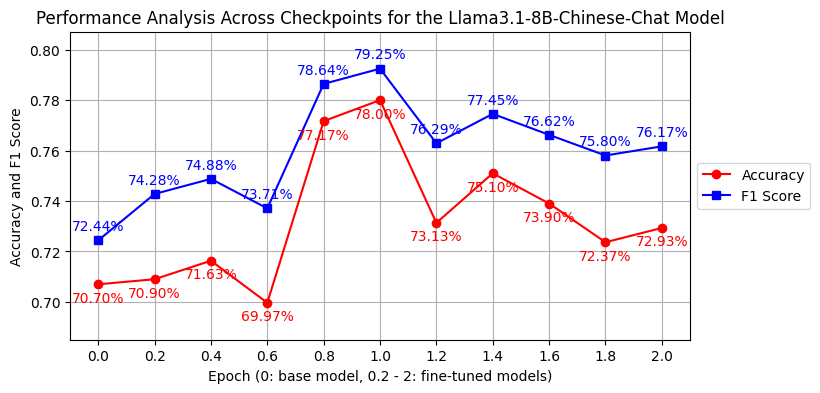

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
不是。         1355
是            495
是。           430
不是           288
回答正确         233
不重要           94
问法错误          67
不是重要          13
不重要。           9
回答正确。          6
不是重要。          4
问法错误。          4
是物品。           1
是小男孩的哭声。       1
Name: count, dtype: int64


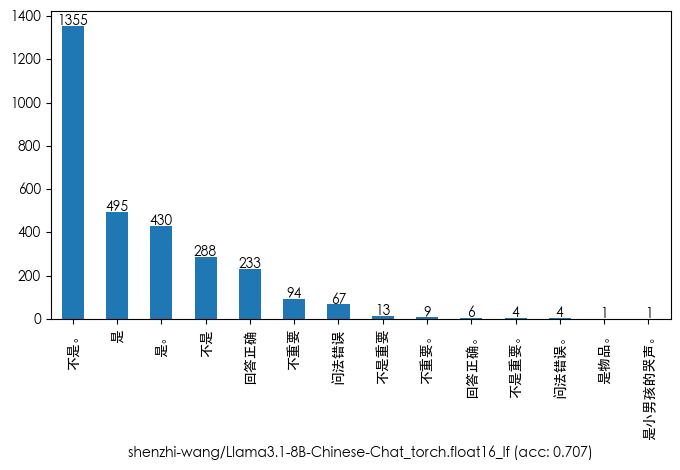

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1245
是       1150
不重要      538
问法错误      38
回答正确      29
Name: count, dtype: int64


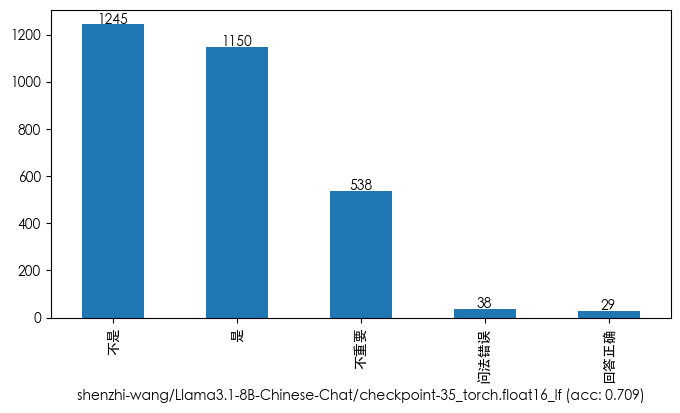

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
不是              1227
是               1185
不重要              544
回答正确              26
问法错误              16
小男孩                1
破旧帽子是小男孩的爷爷的       1
Name: count, dtype: int64


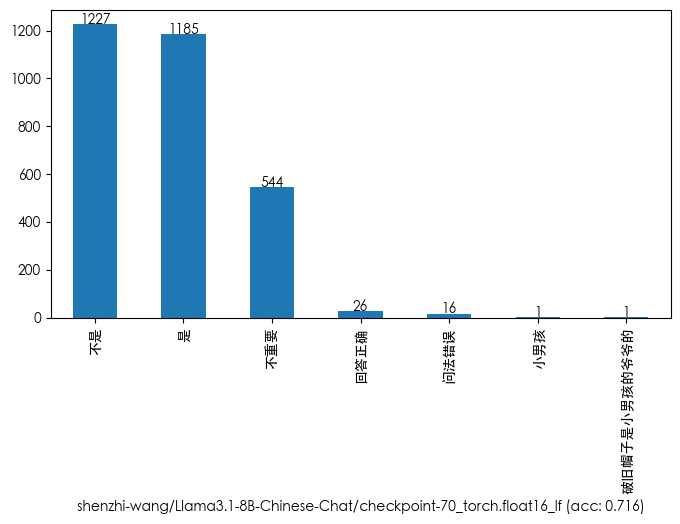

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1206
是       1124
不重要      602
回答正确      36
问法错误      32
Name: count, dtype: int64


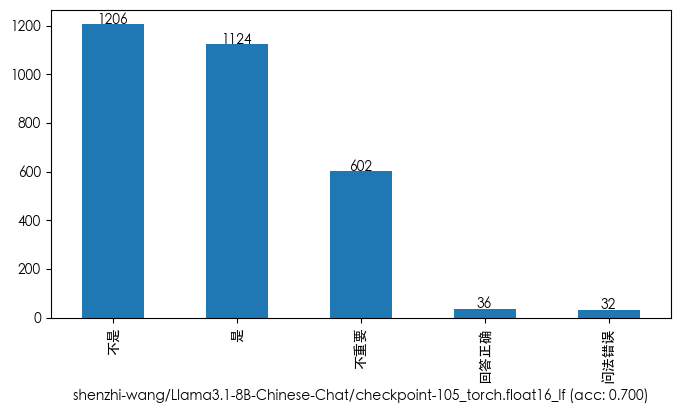

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1458
是       1131
不重要      315
问法错误      59
回答正确      37
Name: count, dtype: int64


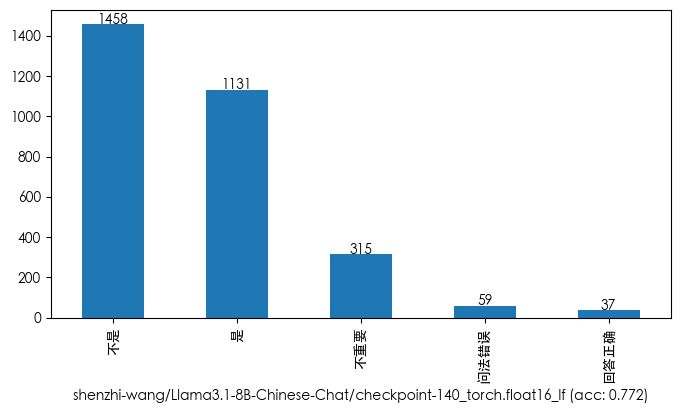

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1483
是       1150
不重要      287
问法错误      49
回答正确      31
Name: count, dtype: int64


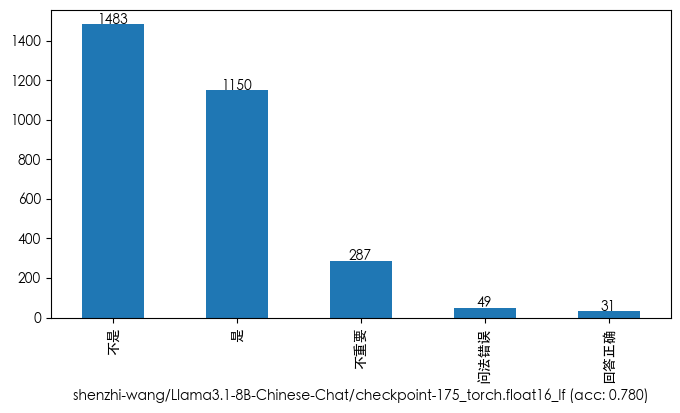

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1260
是       1141
不重要      482
问法错误      83
回答正确      34
Name: count, dtype: int64


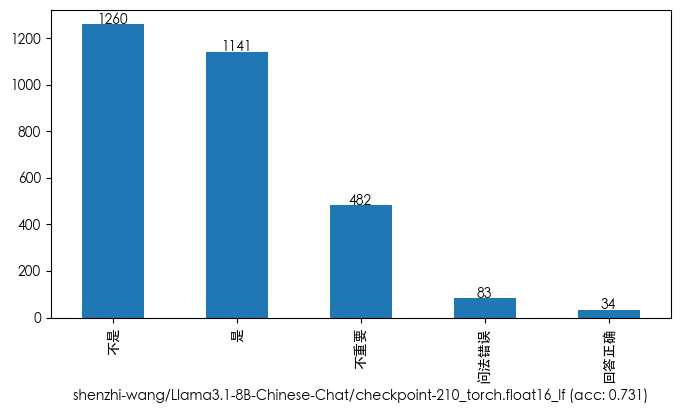

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1348
是       1161
不重要      431
问法错误      31
回答正确      29
Name: count, dtype: int64


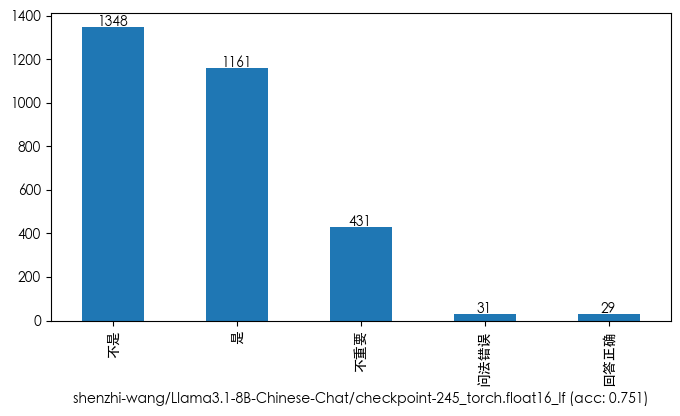

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1359
是       1103
不重要      459
问法错误      47
回答正确      32
Name: count, dtype: int64


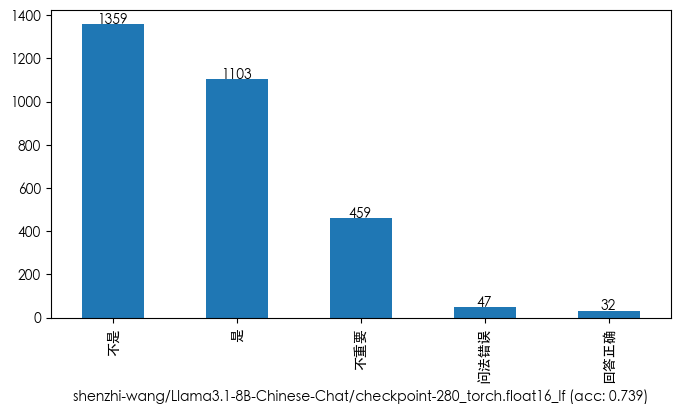

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1302
是       1079
不重要      538
问法错误      46
回答正确      35
Name: count, dtype: int64


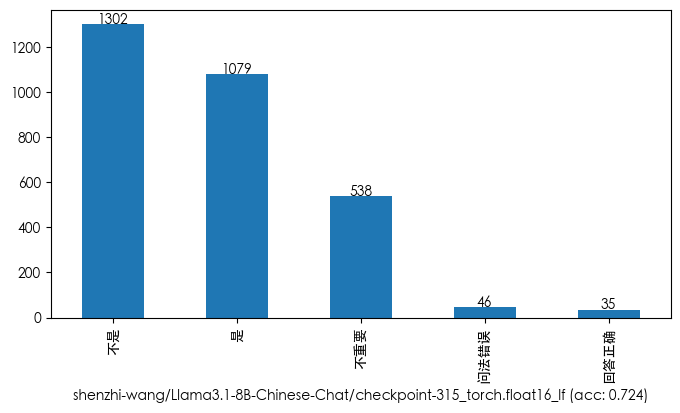

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1309
是       1091
不重要      522
问法错误      43
回答正确      35
Name: count, dtype: int64


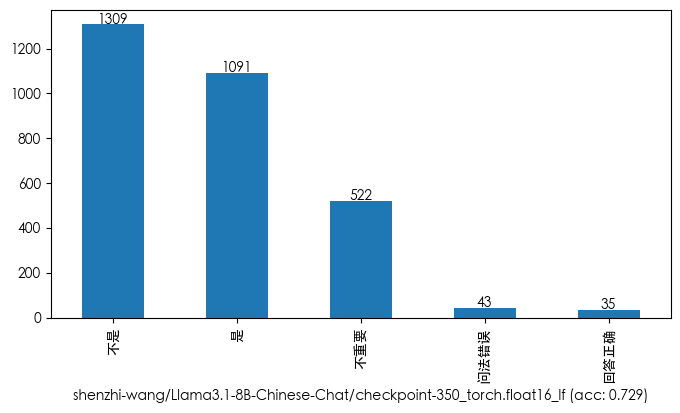

In [12]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
不是。         1355
是            495
是。           430
不是           288
回答正确         233
不重要           94
问法错误          67
不是重要          13
不重要。           9
回答正确。          6
不是重要。          4
问法错误。          4
是物品。           1
是小男孩的哭声。       1
Name: count, dtype: int64


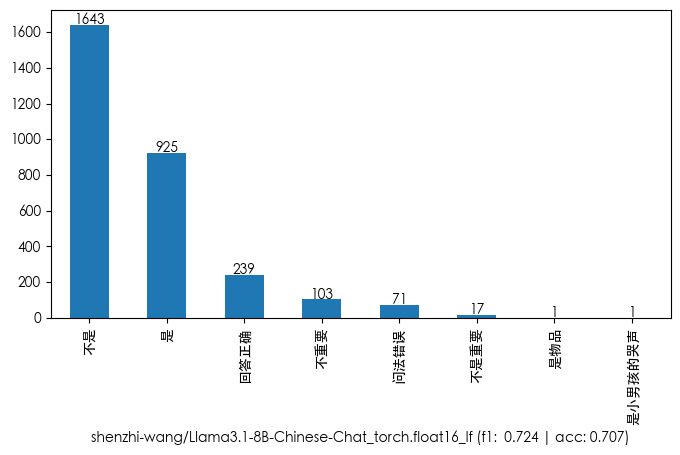

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:583: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


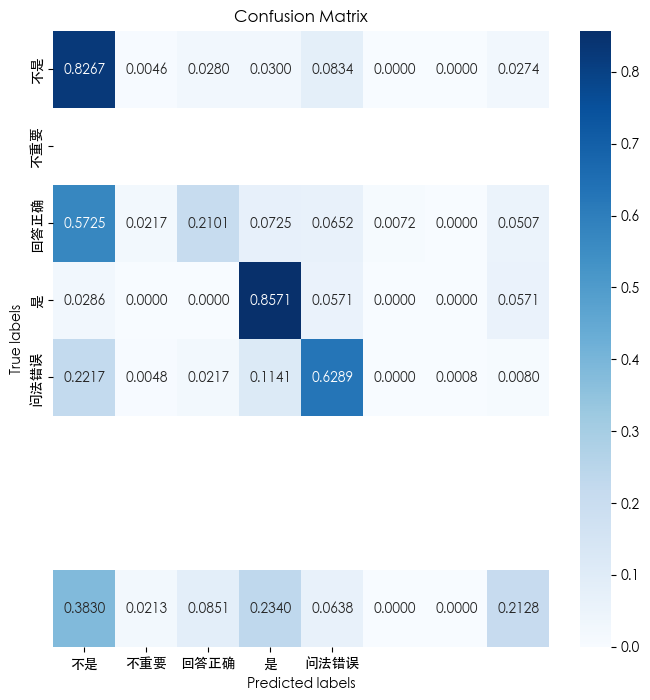

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1245
是       1150
不重要      538
问法错误      38
回答正确      29
Name: count, dtype: int64


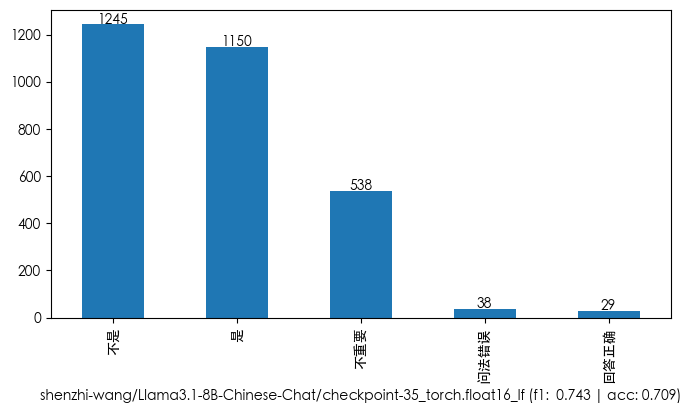

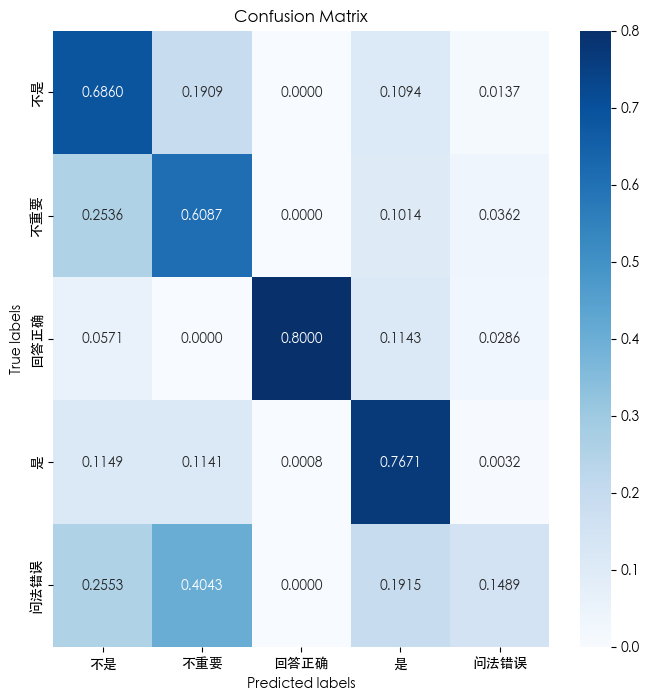

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
不是              1227
是               1185
不重要              544
回答正确              26
问法错误              16
小男孩                1
破旧帽子是小男孩的爷爷的       1
Name: count, dtype: int64


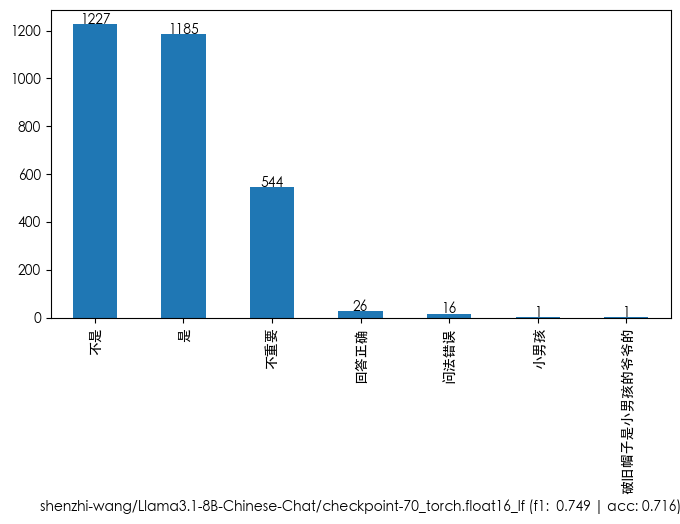

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:583: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


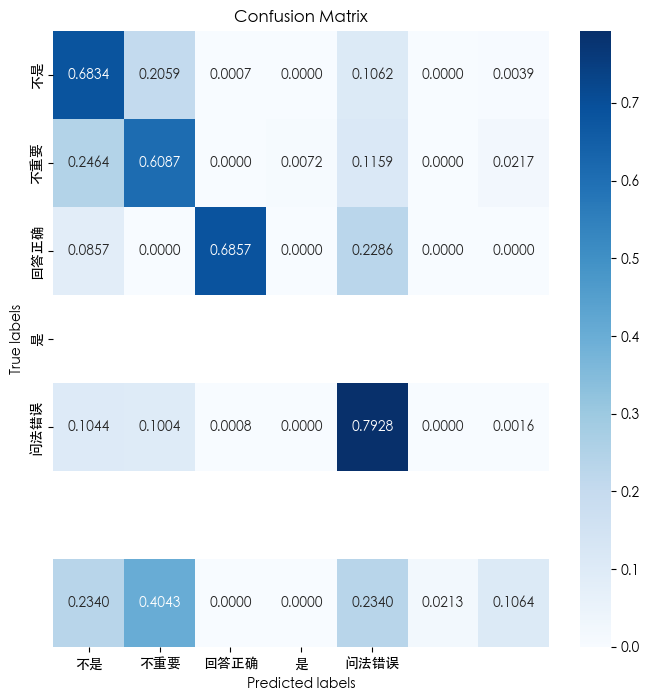

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1206
是       1124
不重要      602
回答正确      36
问法错误      32
Name: count, dtype: int64


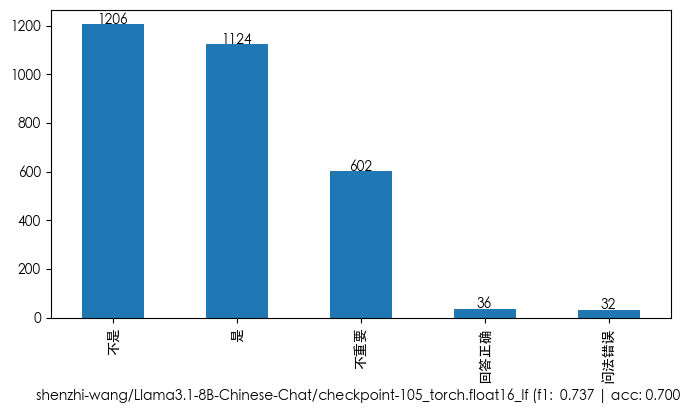

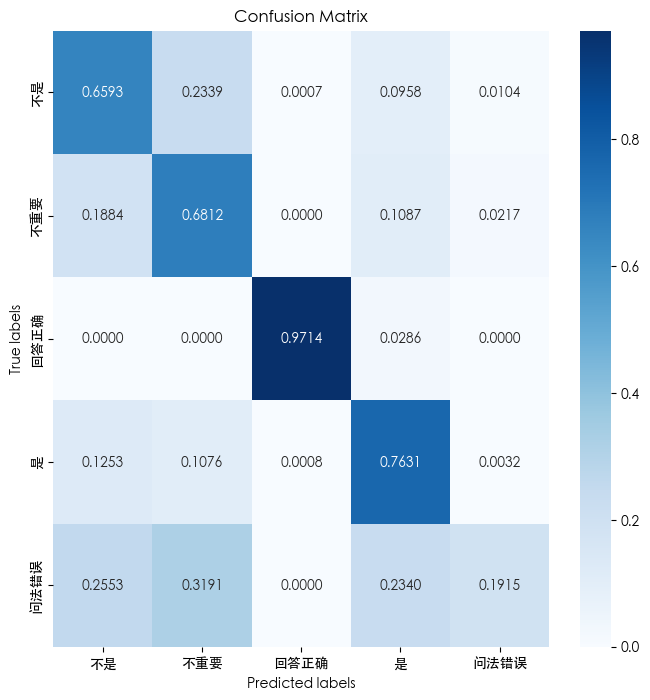

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1458
是       1131
不重要      315
问法错误      59
回答正确      37
Name: count, dtype: int64


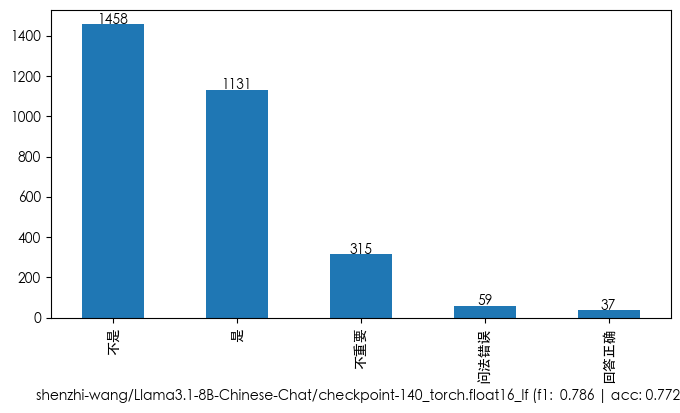

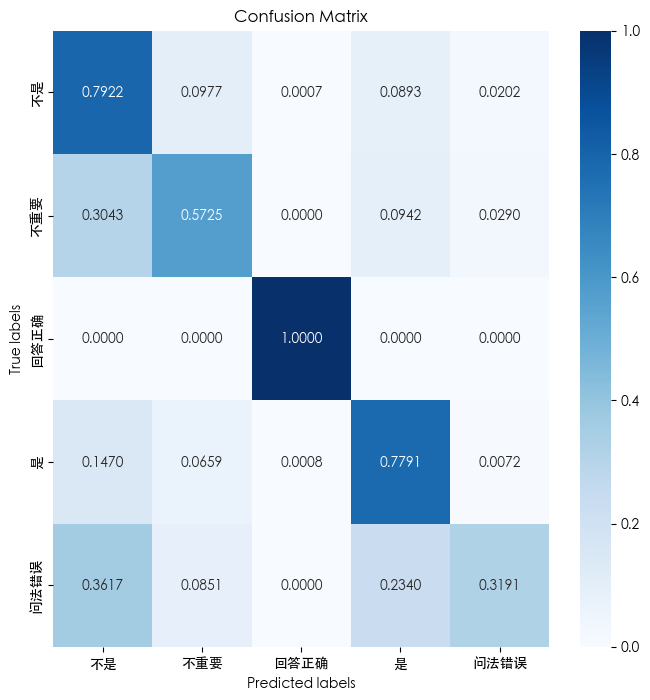

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1483
是       1150
不重要      287
问法错误      49
回答正确      31
Name: count, dtype: int64


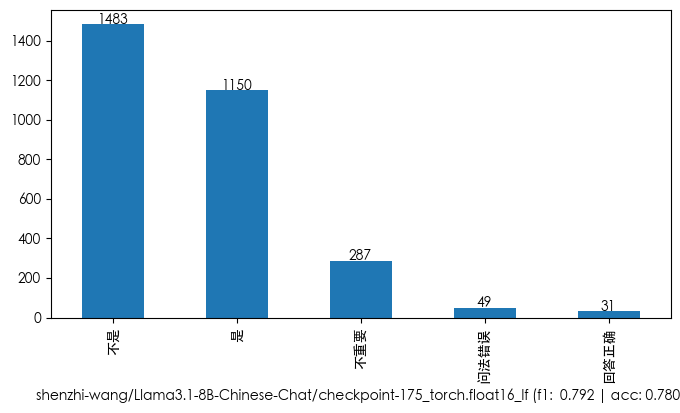

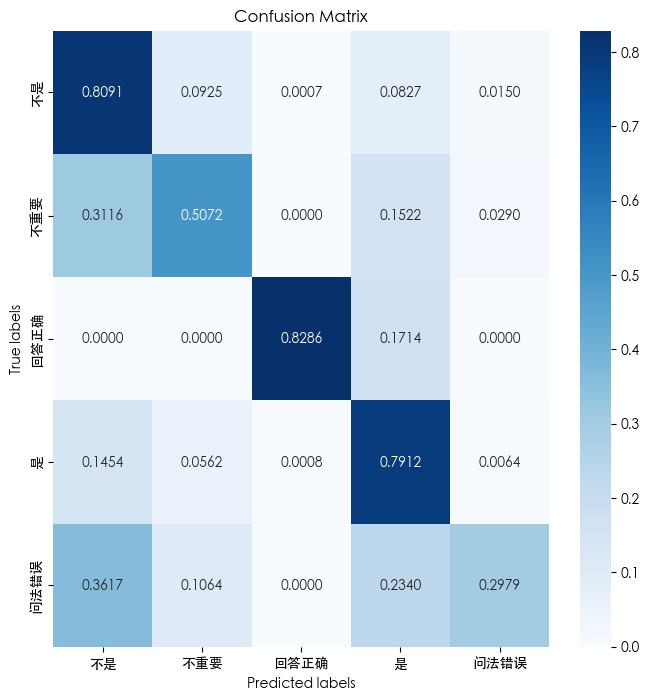

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1260
是       1141
不重要      482
问法错误      83
回答正确      34
Name: count, dtype: int64


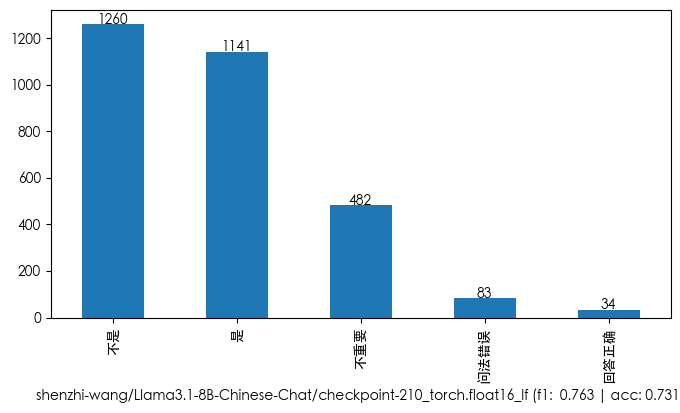

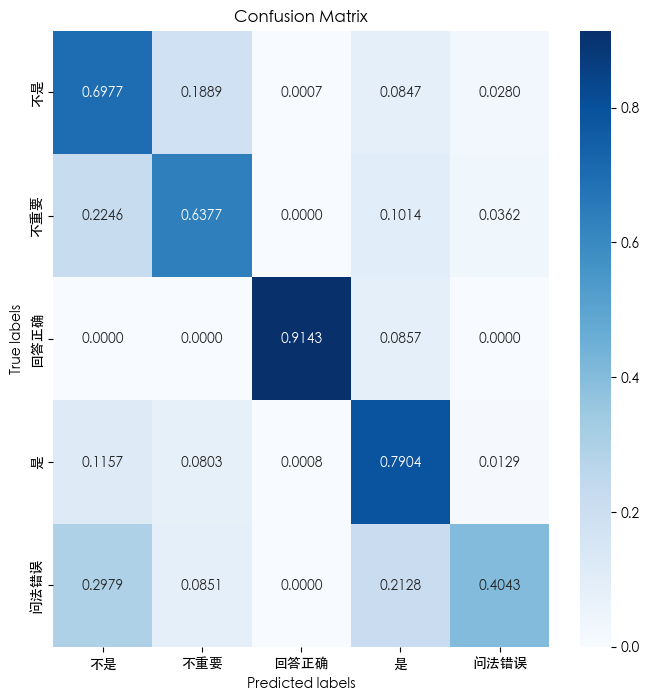

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1348
是       1161
不重要      431
问法错误      31
回答正确      29
Name: count, dtype: int64


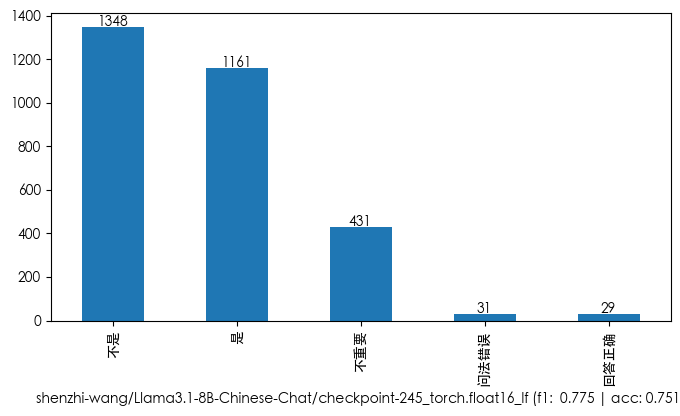

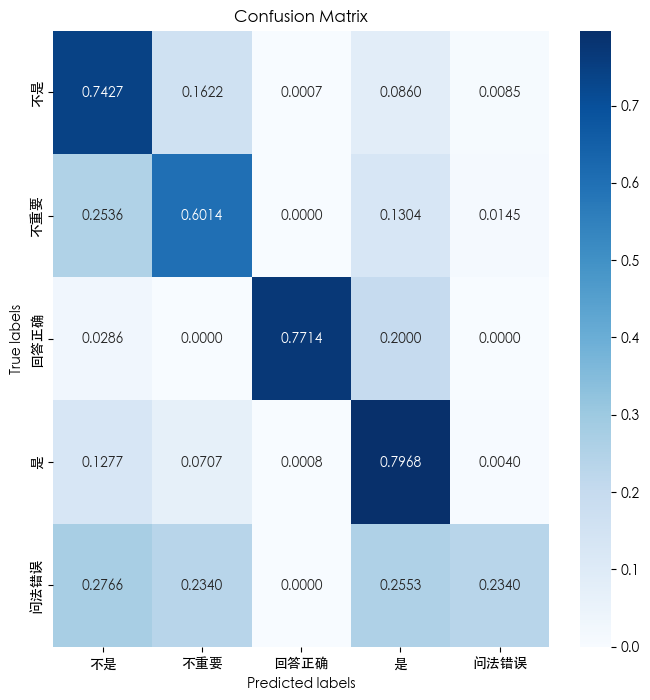

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1359
是       1103
不重要      459
问法错误      47
回答正确      32
Name: count, dtype: int64


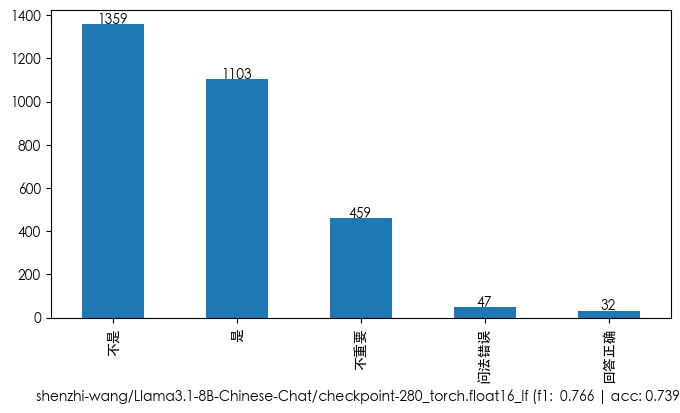

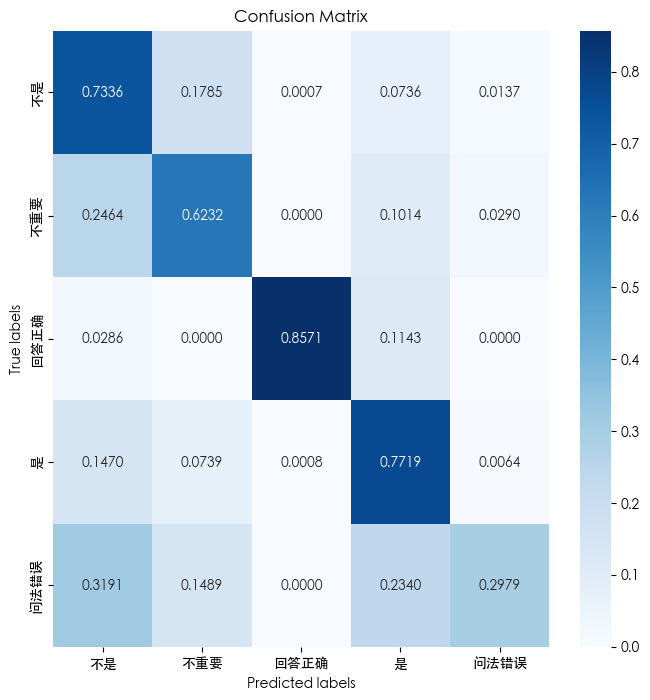

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1302
是       1079
不重要      538
问法错误      46
回答正确      35
Name: count, dtype: int64


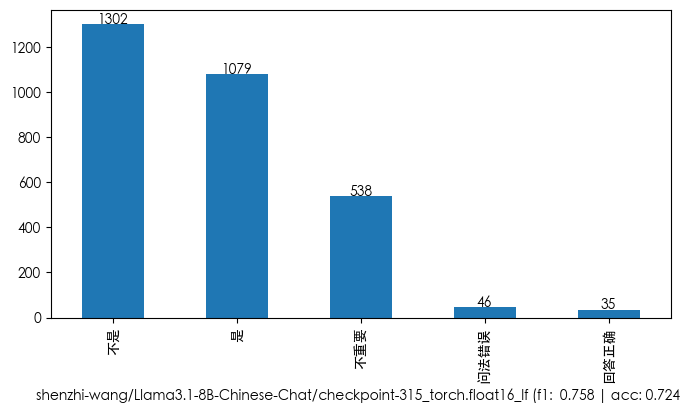

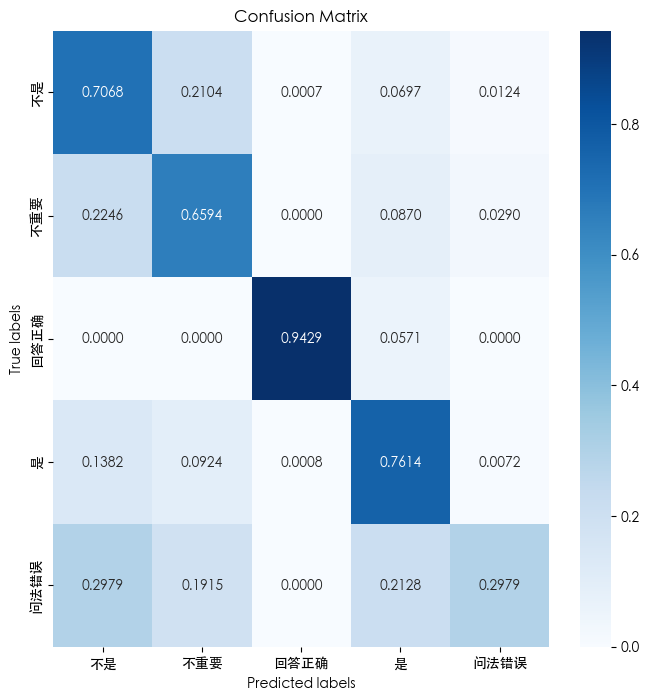

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1309
是       1091
不重要      522
问法错误      43
回答正确      35
Name: count, dtype: int64


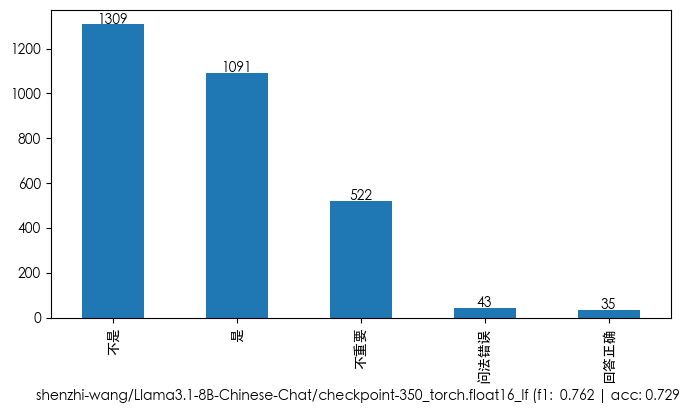

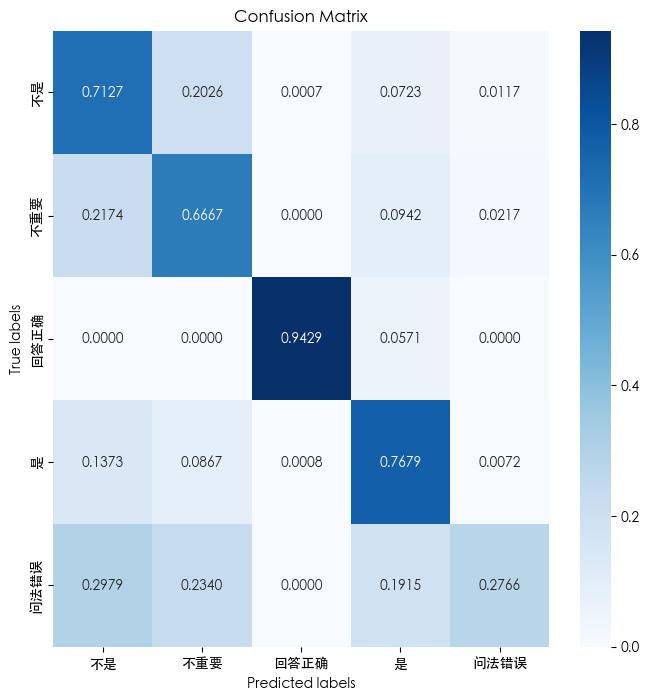

In [13]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )